In [1]:
from qutip import *
from qutip.qip.operations import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
#brute force the alpha beta, no lindblad evolution

# Generating arbitrary alpha beta

In [8]:
np.random.uniform(0,2*np.pi)

0.3706447164283614

In [10]:
def genstate():
    #every run of this cell will generate new alpha beta
    alpha = np.random.random()
    beta = np.sqrt(1-alpha**2)*np.exp(np.random.uniform(0,2*np.pi))
    return(alpha, beta)
#Note that this does not generate uniform(0,1) for beta but it 
#has no affect on the measurement outcomes

In [11]:
#every run of this cell will generate new alpha beta
#alpha = 0.1 #np.random.random()
#beta = np.sqrt(1-alpha**2)
#print('alpha =',alpha)#, '\nbeta =', beta), '\ncheck=', alpha**2+beta**2)

# Making Zs operator and Ucnot

In [18]:
#Strength of the interaction, theta
theta = 0.01
#sigmaz operator that undoes the phase difference.
weak_sz = qeye(2) * np.cos(theta/2) + 1j*sigmaz() * np.sin(theta/2)
Z = tensor(weak_sz, qeye(2))

#Ucnot operator
cx = Qobj(np.matrix('1,0,0,0 ; 0,1,0,0 ; 0,0,0,1 ; 0,0,1,0'))
weak_cx = tensor(qeye(2),qeye(2)) * np.cos(theta) - 1j* cnot() * np.sin(theta)

#Complete interaction
H = Z*weak_cx

# Measurement operators

In [14]:
#Measurement Operators
e = basis(2,1)
g = basis(2,0)

#The following projectors are used to define the "collapse" 
#or measurement operators
proj0 = g * g.dag()
proj1 = e * e.dag()

#operators used to change state to post measurement state
m0 = tensor(qeye(2), proj0)
m1 = tensor(qeye(2), proj1)

#operators used to find prob of alpha,beta
n0 = tensor(proj0, qeye(2))
n1 = tensor(proj1, qeye(2))

# Creating post measurement state for each possible outcome and tensoring new env qubit and repeating.

In [15]:
#arr_of_arr contains every run with different initial states

arr_of_arr = []
count = 0

#100 runs will generate 100 curves on the plot

for j in range(0,100):
    
    #Generating the system and environment state
    alpha, beta = genstate()
    sys = (alpha*basis(2,0) + beta*basis(2,1)).unit()
    env = basis(2,0)
    psi = tensor(sys,g).unit()

    
    ########################################
    arr_e0_s0 = []
    arr_e0_s1 = []
    arr_e1_s0 = []
    arr_e1_s1 = []

    tlist = []
    psit0 = psi
    ########################################
    
    
    #set probs, based on probs do evolution of state. Currently state evolves with m0 by default and thats how a and b are 
    #being calculated
    n = 200
    for i in range(0,n):
        tlist = tlist + [i]
        #expectation value of m0 and m1
        #interact with ZUcnot
        psiH = (H*psit0).unit()
        #prob of no jump and yes jump
        p0 = expect(m0,psiH)
        p1 = 1-p0
        #create RNG number r
        r = np.random.random()
        #no jump case
        if(r<p0):
            #measure env 0, new state with env 0
            psit0 = (m0*psiH).unit()
            #measure sys 0
            e0_s0 = expect(n0,psit0)
            arr_e0_s0 = arr_e0_s0 + [e0_s0]
            #measure sys 1
            e0_s1 = expect(n1,psit0)
            arr_e0_s1 = arr_e0_s1 + [e0_s1]
            psit0 = tensor((psit0[0][0][0]*g + psit0[2][0][0]*e), g) 
            continue
        else:
            #measure env 1, new state w env 1
            count = count + 1
            psit0 = (m1*psiH).unit()
            #measure sys 0
            e1_s0 = expect(n0,psit0)
            arr_e0_s0 = arr_e0_s0 + [e1_s0] + [1]*(n-i-1)
            #measure sys 1
            e1_s1 = expect(n1,psit0)
            arr_e0_s1 = arr_e0_s1 + [e1_s1] + [1]*(n-i-1)
            break
        #reinitialize, adds new env qubit
    arr_of_arr = arr_of_arr + [arr_e0_s1]

In [16]:
for i in arr_of_arr:
    print(len(i))
print('tlist',len(tlist))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
tlist 200


In [17]:
count

2

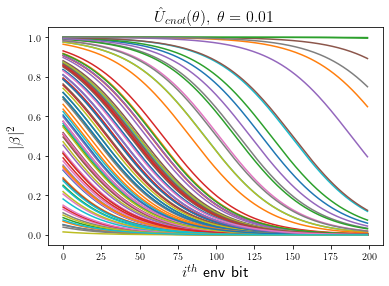

In [332]:
for i in arr_of_arr:    
    plt.plot(tlist,i)
plt.title(r'$\hat{U}_{cnot}(\theta), \; \theta = 0.01$', fontsize=16)
plt.xlabel(r'$i^{th}$ env bit', fontsize=16)
plt.ylabel(r'$|\beta|^2$' , fontsize=16)
#plt.ylabel('beta**2')
#plt.savefig('Plots/cnot_theta0.01_2.png', dpi = 300)
plt.show()

In [330]:
# need to figure out how to introduced 2nd environment qubit onwards. 
# Not sure if mesolve or mcsolve is being used correctly
# the state H*psi
#figure out pre and post measurement state. then we can tensor on the next env qubit and repeat. 
#try recursion on eqn 66
#check if measurement works by writing a simple 1/root2 0 + 1/root2 1